# Gender Classification with Keras
This is an experimentation on gender classification using neural network with keras. The classification will be done by building neural network model based on music and movie preferences.

This is an experimentation of simple neural network in python.

- This algorithm takes dataset for training from file training_data.csv.
- Build model and save its structure and weights to json and h5py
- Predict output(Male|Female) based on new input

## Dataset description
- Extracted from kaggle dataset(https://www.kaggle.com/miroslavsabo/young-people-survey) by using only music and movie preferences
- Contains 32 columns(31 inputs and 1 output(0=Female|1=Male))
- The 31 inputs are consists of music and movie preferences
- Each preferences has integer option 1 to 5 where 1 is very negative and all the way to 5 is positive(Example: Pop. 1=Dont enjoy at all, 5=Enjoy very much)
- Last output is in last column consist of (0=Female|1=Male)

## Research Question
- Based on listed music and movie preferences, is he/she male or female?

## Requirement
- Python: 3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
- scipy: 0.18.1
- numpy: 1.11.3
- sklearn: 0.18.1
- tensorflow: 1.0.0
- keras: 2.0.4
- h5py


In [33]:
import numpy
import os
import pydot
import graphviz

Fix seed for reproducibility

In [34]:
seed = 7
numpy.random.seed(seed)

Load dataset

In [35]:
dataset = numpy.genfromtxt('dataset.csv', delimiter=',', skip_header=1)

Split dataset into two variables, X for datas and Y for labels

In [36]:
X = dataset[:,0:31]
Y = dataset[:,31]

mask = ~numpy.any(numpy.isnan(X), axis=1)

X = X[mask]
Y = Y[mask]

Create model

In [37]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(62, input_dim=31, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(15, kernel_initializer='uniform', activation='relu'))
model.add(Dense(31, kernel_initializer='uniform', activation='relu'))
model.add(Dense(5, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

Compile model

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train model using provided dataset

In [39]:
history = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10)

Train on 604 samples, validate on 298 samples
Epoch 1/500
604/604 [==============================] - 1s 1ms/step - loss: 0.6913 - acc: 0.6060 - val_loss: 0.6897 - val_acc: 0.5839
Epoch 2/500
604/604 [==============================] - 0s 338us/step - loss: 0.6810 - acc: 0.6060 - val_loss: 0.6725 - val_acc: 0.5839
Epoch 3/500
604/604 [==============================] - 0s 324us/step - loss: 0.6484 - acc: 0.6060 - val_loss: 0.6315 - val_acc: 0.5839

Test trained model

In [40]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

902/902 [==============================] - 0s 46us/step
acc: 90.47%


Save model structure and weight

In [41]:
model_json = model.to_json()
with open("model_structure.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model_weight.h5")

Plot model training and validation accuracy and loss

<IPython.core.display.Javascript object>


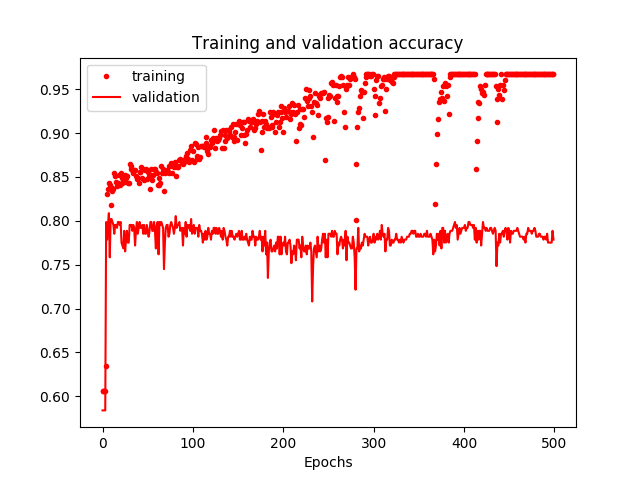

In [43]:
%matplotlib notebook

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig_accuracy = plt.figure()
plt.plot(epochs, acc, 'r.', label='training')
plt.plot(epochs, val_acc, 'r', label='validation')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')
# fig_accuracy.savefig('fine_tuning_plot_accuracy_%d_%d_%d.png' % (EPOCHS, BAT_SIZE, FROZEN_LAYERS))
plt.show()